In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import math
import csv
import lmfit
import numpy.fft as fft

In [2]:
v2 = (((55)/(10000+55.0))*(50.0))/1000.0 #units is in volts

In [3]:
def ft(x):              #fourier transform to find the frequency
    spectrum = fft.fft(x)

    freq = fft.fftfreq(len(spectrum))

    threshold = 0.7 * max(abs(spectrum))
    mask = abs(spectrum) > threshold
    peaks = freq[mask]
    return peaks

In [4]:
def sinmodel(params, x):   #lmfit to fit the sine functions
    A = params['A'].value
    B = params['B'].value
    f = params['f'].value
    output = A*np.sin(2*np.pi*f*x+B)
    return output

def sinfit(params, x, data, err):
    model = sinmodel(params, x)
    return (model-data)/err

In [5]:
def findgain():            #protagonist of this code
    gain = []
    for i in range(1,78):      #opening file and putting it into time array and volt array
        x = "NewFile" + str(i) + ".csv"
        t = []
        volt = []
        
        with open(x,'rb') as gaincsv:
            read = csv.reader(gaincsv)
            for d in read:
                t.append(d[0])
                volt.append(d[1])
        t = t[2:]
        volt = volt[2:]
        t = np.array([float(i) for i in t])
        volt = np.array([float(i) for i in volt])

        error = [0.2]*len(t)                   #error for fitting
        er = np.array(error)
        
        
        params = lmfit.Parameters()            #fitting parameters
        params.add('A', value = 1, vary = True)
        params.add('B', value = 0.0)
        params.add('f', value = ft(volt)[0], vary = True)

        result = lmfit.minimize(sinfit, params, args = (t, volt, er))   #fitting
        
        if result.redchi > 1.0:             #if the frequency we use is bad, use the next one
            params.add('f', value = float(ft(volt)[1]), vary = True)

            result = lmfit.minimize(sinfit, params, args = (t, volt, er))
            gain.append(result.params['A'])
            print 'This message means there is a bad fit.'
            
        else:                             #if the frequency is good, use it
            gain.append(result.params['A'])
    return gain                          #returns a array of frequencies

In [6]:
gainx = abs(np.array(findgain()))

freq = [10,20,30,40,50,60,70,80,90,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000,1100,1200,1300,1400,1500,1600
     ,1700,1800,1900,2000,2200,2400,2600,2800,3000,3500,4000,4500,5000,5500,6000,6500,7000,7500,8000,8500,9000,9500,10000,12000,14000,16000,18000,20000,
     22000,24000,26000,28000,30000,35000,40000,45000,50000,55000,60000,70000,80000,90000,100000]

# freq = np.array([90,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000,1100,1200,1300,1400,1500,1600
#      ,1700,1800,1900,2000,2200,2400,2600,2800,3000,3500,4000,4500,5000,5500,6000,6500,7000,7500,8000,8500,9000,9500,10000,12000,14000,16000,18000,20000,
#      22000,24000,26000,28000,30000,35000,40000,45000,50000,55000,60000,70000,80000,90000,100000])


This message means there is a bad fit.
This message means there is a bad fit.
This message means there is a bad fit.
This message means there is a bad fit.
This message means there is a bad fit.
This message means there is a bad fit.
This message means there is a bad fit.
This message means there is a bad fit.
This message means there is a bad fit.
This message means there is a bad fit.
This message means there is a bad fit.
This message means there is a bad fit.


In [7]:
gainsq = (gainx/v2)**2

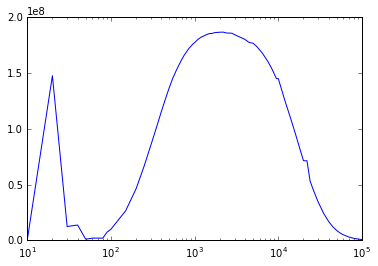

In [8]:
plt.plot(freq,gainsq)
plt.xscale('log') 
#something's weird about the first few files, so for we used the data points we got from the very first time we did the experiment

In [9]:
print gainsq

[  1.81133109e+04   1.47612047e+08   1.25000867e+07   1.38580411e+07
   1.12767559e+06   2.10371752e+06   2.10371752e+06   2.10371752e+06
   7.46911533e+06   1.00308130e+07   2.65759281e+07   4.63261724e+07
   6.68098262e+07   8.53666552e+07   1.01166889e+08   1.15348285e+08
   1.27156482e+08   1.37266081e+08   1.45602759e+08   1.51885221e+08
   1.57254351e+08   1.61913185e+08   1.65932739e+08   1.69015495e+08
   1.71875510e+08   1.73902881e+08   1.75905513e+08   1.77292391e+08
   1.80296143e+08   1.82208688e+08   1.83428243e+08   1.84544560e+08
   1.85434400e+08   1.85434547e+08   1.86045830e+08   1.86414919e+08
   1.86442440e+08   1.86627912e+08   1.86693555e+08   1.85919311e+08
   1.85829930e+08   1.85684870e+08   1.84443666e+08   1.82145220e+08
   1.80127363e+08   1.77298368e+08   1.76778656e+08   1.73971924e+08
   1.70672883e+08   1.67526887e+08   1.63824532e+08   1.60476114e+08
   1.56709814e+08   1.52864825e+08   1.48783086e+08   1.45036881e+08
   1.45036881e+08   1.25213126e+08

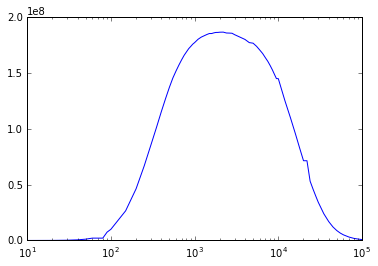

In [17]:
gainx[0] = 0.041
gainx[1] = 0.075
gainx[2] = 0.134
gainx[3] = 0.208
gainx[4] = 0.296
fixgainsq = (gainx/v2)**2
plt.plot(freq,fixgainsq)
plt.xscale('log')

In [18]:
np.trapz(fixgainsq,freq)
#this our delta f

3746583485735.5767